# Embeddings visualization

Nuestro objetivo es obtener un modelo de clasificación que prediga, a partir de los datos de un paciente, si tiene alto riesgo de mortalidad o no. Luego de observar la distribución de las features y ver que no hay fuerte correlación entre las variables, vamos a analizar si nuestro conjunto de datos es separable para tener una noción de que tan bueno pueden llegar a ser nuestros modelos.

Para ello vamos a utilizar tecnicas de reducción de dimensionalidad, proyección de variables o metodos de compresion, para visualizar nuestro dataset en menos dimensiones, y de esa forma encontrar características que nos den un indicio de los mismos.

El objetivo es ver cómo estan distribuidos nuestros datos.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
DATASET_PATH = '../data/imputed_data.csv'

In [3]:
df = pd.read_csv(DATASET_PATH)

In [6]:
NUMERICAL_FEATURES = ['PESO Kg', 'ALTURA cm', 'TROPONINA MAX', 'CREAT', 'GLUCEMIA INGR', 'GB', 'TAS INGRESO', 'FC INGRESO']
CATEGORY_FEATURES = ['SEX0', 'HTA', 'DBT', 'DLP', 'TABAQ', 'ANTEC IAM / Angina inestable', 'ANTEC BY PASS', 'ANTEC ATC', 'ANTEC ACE', 'ANTEC INS RENAL', 'ACV TIA PREV', 'EPOC', 'CLAUD ITTE', 'BB PREV', ' IECA/AT2  PREV', 'B CA PREV', 'AAS PREV', 'HIPOGLUCEMIANTES', 'DIURETICOS', 'INSULINA', 'ECG INFRA ST', 'ECG SUPRA ST', 'ECG INV T', 'BRI', 'BRD', 'ECG MCP', 'ECG FA', 'tropst', 'TnT Ultrasensible', 'Elevacion troponina T', 'KILLIP Ingreso', 'AAS', 'BB', 'IECA', 'AT2', 'Clopi - prasu - tica', 'HEP sc o iv', 'IIb IIIa', 'B CA', 'ESTATINAS', 'HIPOGLUC METFORM', 'HIPOGL SULFAN', 'HIPOGL GLITAZ', 'INSULINA', 'INS + HIPOGL', 'INOTROPICOS', 'FUNCION VENTRICULAR IZQ', 'DIAGNOSTICO', 'PRUEBA FUNC.', 'PRUEBA FUNC DE ALTO RIESGO', 'CCG', 'TRONCO', 'ATC PRIMARIA', 'ATC INTRAHOSP', 'TROMBOL', 'CRM', 'IAM HOSP(SI INTERNO POR ANGINA) O REIAM', 'APIAM', 'Peor KILLIP', 'ANGINA REFRACT o RECURR', ' ACV/TIA', 'SANGRADO MAYOR*', 'I RENAL AGUDA', 'NUMERO VASOS']

FEATURES = NUMERICAL_FEATURES + CATEGORY_FEATURES

TARGET = "MUERTE HOSP"

In [7]:
# Aplicar StandardScaler seguido de MinMaxScaler a las columnas numéricas
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Ajustar y transformar con StandardScaler
df[NUMERICAL_FEATURES] = standard_scaler.fit_transform(df[NUMERICAL_FEATURES])

# Ajustar y transformar con MinMaxScaler
df[NUMERICAL_FEATURES] = min_max_scaler.fit_transform(df[NUMERICAL_FEATURES])

X = df[FEATURES].values
y = df[TARGET].values

Creamos una funcion para visualizar los embeddings:

In [9]:
def plot_embedding(X, title):
    _, ax = plt.subplots()
    # X = MinMaxScaler().fit_transform(X)

    for digit in [1, 0]:
        ax.scatter(
            *X[y.reshape(-1, ) == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )

    ax.set_title(title)
    ax.axis("off")
    plt.show()

Calculamos los embeddings:

In [30]:
from sklearn.decomposition import TruncatedSVD, PCA, FastICA
from sklearn.manifold import MDS, TSNE
from umap.umap_ import UMAP

embeddings = {
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "PCA embedding": PCA(
        n_components=2,
        random_state=0
    ),
    "ICA embedding": FastICA(
        n_components=2,
        random_state=0
    ),
    "MDS embedding": MDS(
        n_components=2,
        n_init=1,
        max_iter=120,
        random_state=0,
        n_jobs=2),
    "t-SNE embedding": TSNE(
        n_components=2,
        # init="pca",
        # learning_rate="auto",
        # n_iter=500,
        # n_iter_without_progress=150,
        n_jobs=-1,
        random_state=0,
    ),
    "UMAP embedding": UMAP(
        n_components=2,
        random_state=0,
    )
}

In [31]:
projections = {}
for name, transformer in embeddings.items():
    projections[name] = transformer.fit_transform(X, y)
    

c:\Users\andre\workspace\HA-mortality-prediction\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


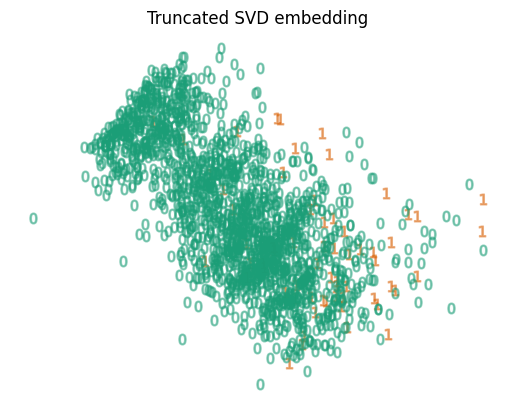

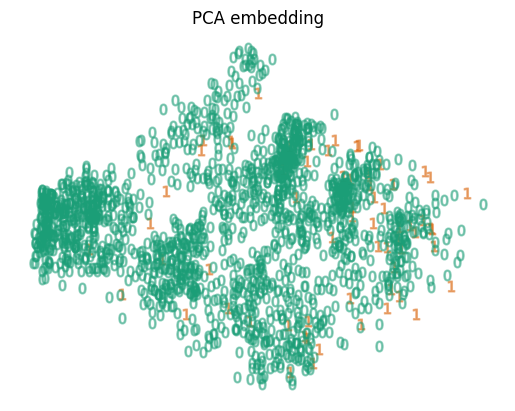

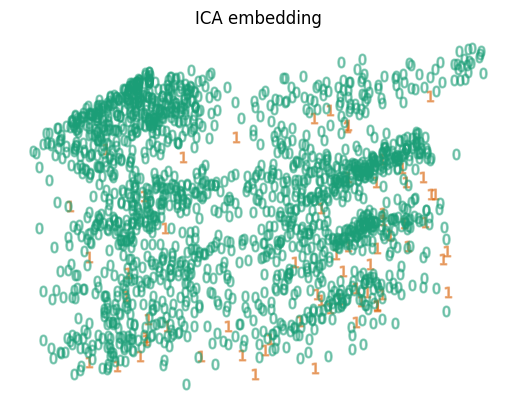

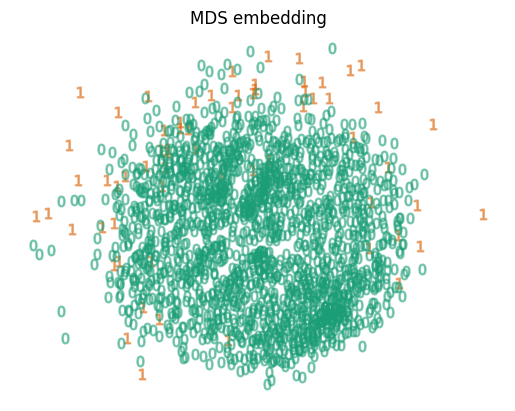

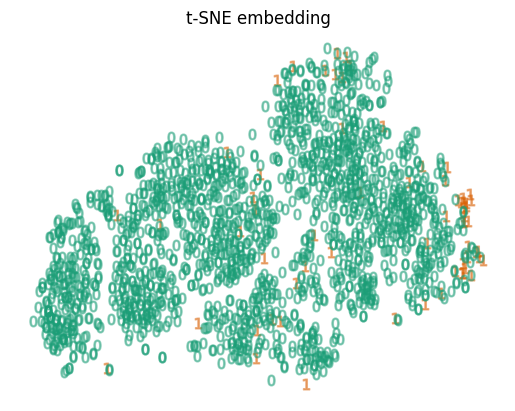

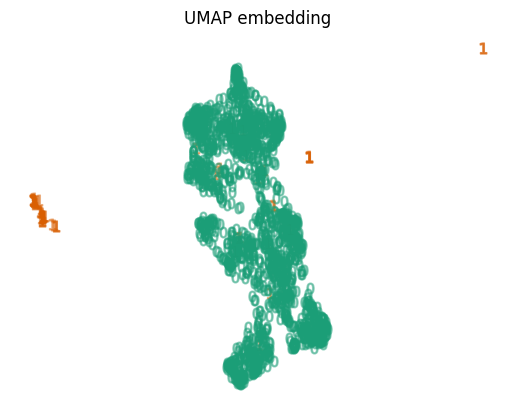

In [32]:
for name in embeddings.keys():
    plot_embedding(projections[name], name)

Vemos que los modelos que reducen dimensiones no nos sugieren algun patron en los datos que podamos tener en cuenta para aplicar algun modelo.

En los modelos de visualizacion no se observan muchas diferencias (tal vez habria que encontrar los parámetros óptimos para poder encontrar patrones en T-SNE), salvo en UMAP. Donde se ven clusteres bien definidos.

**Esto nos sugiere que en algun espacio, existe un método de clusterización que puede llegar a separar (clasificar) nuestro dataset.**